<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week3/Notebook3_2_Faisal_Elawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*


In [2]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [124]:
grads = pd.read_csv("https://raw.githubusercontent.com/falawar7/AAI614_ElAWAR/main/Week3/grads.csv")

In [5]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [7]:
import numpy as np

Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

**Answer for Qeustion 1**

Outliers in Avg Hours Studies per Week (IQR method): 100

In [52]:
# Function to identify outliers using IQR
def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nIdentifying outliers using IQR Method:")
for col in numeric_cols:
    outliers_IQR, lower, upper = identify_outliers_IQR(grads[col])
    if not outliers_IQR.empty:
        print(f"\nOutliers in {col} (IQR method):")
        print(outliers_IQR)
        print(f"Lower Bound: {lower}")
        print(f"Upper Bound: {upper}")


Identifying outliers using IQR Method:

Outliers in Avg Hours Studies per Week (IQR method):
6    100
Name: Avg Hours Studies per Week, dtype: int64
Lower Bound: -25.0
Upper Bound: 95.0


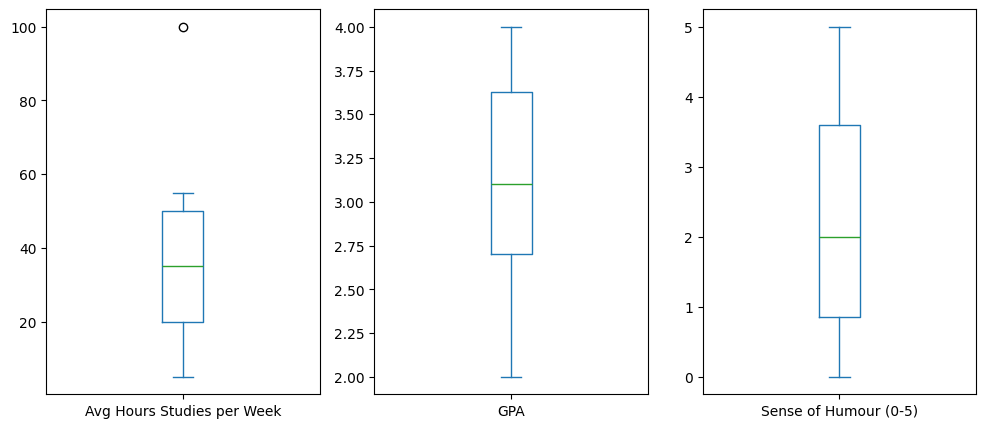

In [26]:
import matplotlib.pyplot as plt
grads.plot(kind = 'box', subplots = True, figsize = (12, 5))
plt.show()

In [161]:
grads['Salary'] = grads['Salary'].replace({'\$': ''}, regex=True)

In [30]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40k
1,Jerry,35,3.5,Columbia,5.0,80k
2,Elaine,55,4.0,Columbia,4.2,60k
3,Cosmo,5,2.0,City College,2.0,25k
4,Newman,25,2.8,City College,0.0,50k
5,Frank,35,3.0,Festivus Uni,NaN,40k
6,Estelle,100,3.2,Festivus Uni,1.7,0k
7,Leo,15,2.4,Festivus Uni,0.0,35k
8,Rachel,50,4.0,Columbia,NaN,75k


In [162]:
grads['Salary'] = grads['Salary'].str.replace('k', '000', regex=False).astype(int)

In [41]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40000
1,Jerry,35,3.5,Columbia,5.0,80000
2,Elaine,55,4.0,Columbia,4.2,60000
3,Cosmo,5,2.0,City College,2.0,25000
4,Newman,25,2.8,City College,0.0,50000
5,Frank,35,3.0,Festivus Uni,NaN,40000
6,Estelle,100,3.2,Festivus Uni,1.7,0
7,Leo,15,2.4,Festivus Uni,0.0,35000
8,Rachel,50,4.0,Columbia,NaN,75000


In [60]:
# Function to identify outliers using IQR
def identify_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nIdentifying outliers using IQR Method:")
for col in numeric_cols:
    outliers_IQR, lower, upper = identify_outliers_IQR(grads[col])
    if not outliers_IQR.empty:
        print(f"\nOutliers in {col} (IQR method):")
        print(outliers_IQR)
        print(f"Lower Bound: {lower}")
        print(f"Upper Bound: {upper}")


Identifying outliers using IQR Method:

Outliers in Avg Hours Studies per Week (IQR method):
6    100
Name: Avg Hours Studies per Week, dtype: int64
Lower Bound: -25.0
Upper Bound: 95.0


In [56]:
numeric_cols = grads.select_dtypes(include=[np.number]).columns
print(f"Numeric Columns: {numeric_cols}")

Numeric Columns: Index(['Avg Hours Studies per Week', 'GPA', 'Sense of Humour (0-5)', 'Salary'], dtype='object')


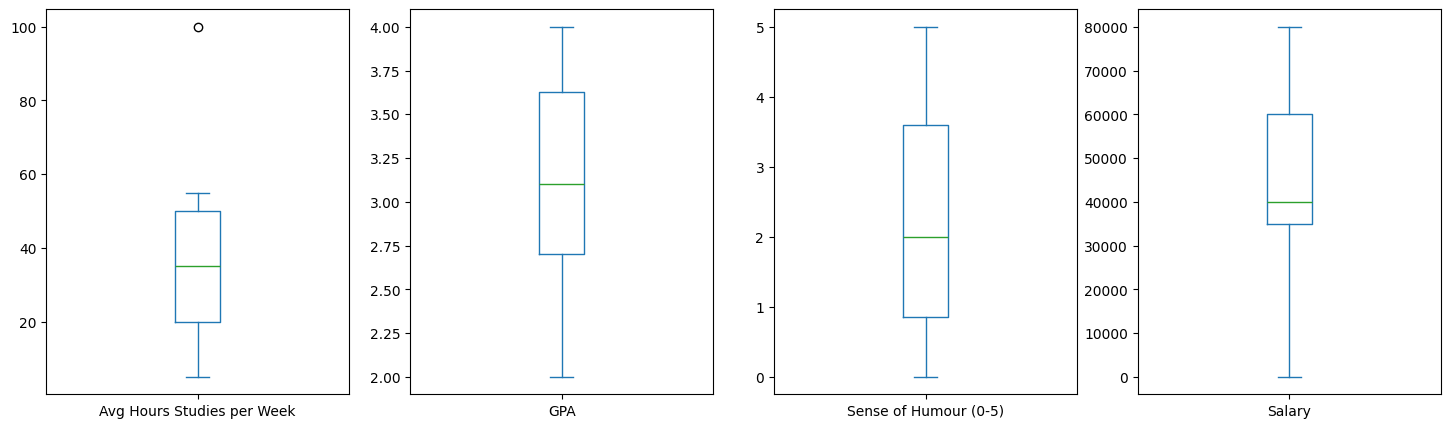

In [48]:
import matplotlib.pyplot as plt
grads.plot(kind = 'box', subplots = True, figsize = (18, 5))
plt.show()

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

**Answer for Question2 :**
- Removed the outlier on Row 6 which is 100
- applied the Col and Row Threshold / 2 so it will not be dropped
- Identify numeric and non-numeric columns


In [64]:
grads.describe()

,Avg Hours Studies per Week,GPA,Sense of Humour (0-5),Salary
count,9.000000,8.000000,7.000000,9.000000
mean,37.777778,3.112500,2.271429,45000.000000
std,28.296545,0.716016,1.932800,24874.685928
min,5.000000,2.000000,0.000000,0.000000
25%,20.000000,2.700000,0.850000,35000.000000
50%,35.000000,3.100000,2.000000,40000.000000
75%,50.000000,3.625000,3.600000,60000.000000
max,100.000000,4.000000,5.000000,80000.000000


In [54]:
grads.shape

(9, 6)

In [155]:
outlier_indices = outliers(grads, 'Avg Hours Studies per Week')

In [156]:
grads = grads.drop(index=outlier_indices)

In [152]:
def remove(grads,index_list):
    for i in index_list:
        grads = grads.drop(i)
    return grads

In [163]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40000
1,Jerry,35,3.5,Columbia,5.0,80000
2,Elaine,55,4.0,Columbia,4.2,60000
3,Cosmo,5,2.0,City College,2.0,25000
4,Newman,25,2.8,City College,0.0,50000
5,Frank,35,3.0,Festivus Uni,NaN,40000
7,Leo,15,2.4,Festivus Uni,0.0,35000
8,Rachel,50,4.0,Columbia,NaN,75000


In [158]:
missing_data = grads.isnull().sum()  # Number of missing values per column
missing_percentage = (missing_data / grads.shape[0]) * 100  # Percentage of missing values
print(f"Missing values per column:\n{missing_data}")
print(f"\nMissing percentage per column:\n{missing_percentage}")

Missing values per column:
Student Name                  0
Avg Hours Studies per Week    0
GPA                           1
University                    0
Sense of Humour (0-5)         2
Salary                        0
dtype: int64

Missing percentage per column:
Student Name                   0.0
Avg Hours Studies per Week     0.0
GPA                           12.5
University                     0.0
Sense of Humour (0-5)         25.0
Salary                         0.0
dtype: float64


In [159]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [164]:
row_threshold = grads.shape[0]/2
col_threshold = grads.shape[1]/2

grads.dropna(axis = 0, thresh = row_threshold, inplace = True)
grads.dropna(axis = 1, thresh = col_threshold, inplace = True)

In [165]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40000
1,Jerry,35,3.5,Columbia,5.0,80000
2,Elaine,55,4.0,Columbia,4.2,60000
3,Cosmo,5,2.0,City College,2.0,25000
4,Newman,25,2.8,City College,0.0,50000
5,Frank,35,3.0,Festivus Uni,NaN,40000
7,Leo,15,2.4,Festivus Uni,0.0,35000
8,Rachel,50,4.0,Columbia,NaN,75000


Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

**Answer 3:**

- Initialize the SimpleImputer to handle missing values for numeric column with Mean
- imputer only to numeric columns repalced NaN with numerical values by applying the Frequent Method

In [ ]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40000
1,Jerry,35,3.5,Columbia,5.0,80000
2,Elaine,55,4.0,Columbia,4.2,60000
3,Cosmo,5,2.0,City College,2.0,25000
4,Newman,25,2.8,City College,0.0,50000
5,Frank,35,3.0,Festivus Uni,NaN,40000
7,Leo,15,2.4,Festivus Uni,0.0,35000
8,Rachel,50,4.0,Columbia,NaN,75000


In [167]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Display the first few rows of the DataFrame to understand its structure
print("Original DataFrame:")
print(grads.head())

# Identify numeric and non-numeric columns
numeric_cols = grads.select_dtypes(include=np.number).columns
non_numeric_cols = grads.select_dtypes(exclude=np.number).columns

# Initialize the SimpleImputer to handle missing values for numeric columns
imputer = SimpleImputer(strategy='mean')

# Apply the imputer only to numeric columns
grads[numeric_cols] = imputer.fit_transform(grads[numeric_cols])

# Display the DataFrame after imputation
print("\nDataFrame after imputation:")
print(grads.head())

Original DataFrame:
  Student Name  Avg Hours Studies per Week  GPA    University  \
0       George                          20  NaN           NYU   
1        Jerry                          35  3.5      Columbia   
2       Elaine                          55  4.0      Columbia   
3        Cosmo                           5  2.0  City College   
4       Newman                          25  2.8  City College   

   Sense of Humour (0-5)  Salary  
0                    3.0   40000  
1                    5.0   80000  
2                    4.2   60000  
3                    2.0   25000  
4                    0.0   50000  

DataFrame after imputation:
  Student Name  Avg Hours Studies per Week  GPA    University  \
0       George                        20.0  3.1           NYU   
1        Jerry                        35.0  3.5      Columbia   
2       Elaine                        55.0  4.0      Columbia   
3        Cosmo                         5.0  2.0  City College   
4       Newman           

In [168]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20.0,3.1,NYU,3.000000,40000.0
1,Jerry,35.0,3.5,Columbia,5.000000,80000.0
2,Elaine,55.0,4.0,Columbia,4.200000,60000.0
3,Cosmo,5.0,2.0,City College,2.000000,25000.0
4,Newman,25.0,2.8,City College,0.000000,50000.0
5,Frank,35.0,3.0,Festivus Uni,2.366667,40000.0
7,Leo,15.0,2.4,Festivus Uni,0.000000,35000.0
8,Rachel,50.0,4.0,Columbia,2.366667,75000.0


Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [169]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-169-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-169-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [170]:
# Print the original DataFrame with missing values
print("Original DataFrame with missing values:")
print(df_miss)

# Initialize the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Impute the missing values in 'col_0' only
imputer.fit(df_miss[['col_0']])
df_miss['col_0'] = imputer.transform(df_miss[['col_0']])

# Print the DataFrame after imputation
print("\nDataFrame after imputing 'col_0' with the median:")
print(df_miss)


Original DataFrame with missing values:
      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720

DataFrame after imputing 'col_0' with the median:
      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.

Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [171]:
# Print the original DataFrame with missing values
print("Original DataFrame with missing values:")
print(df_miss)

Original DataFrame with missing values:
      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


In [172]:
# Initialize the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Impute the missing values in 'col_0' only
imputer.fit(df_miss[['col_1']])
df_miss['col_1'] = imputer.transform(df_miss[['col_1']])

# Print the DataFrame after imputation
print("\nDataFrame after imputing 'col_1' with the median:")
print(df_miss)


DataFrame after imputing 'col_1' with the median:
      col_0     col_1     col_2     col_3     col_4
0  0.677205  0.687155  0.265048  0.783205  0.918001
1  0.827355  0.687155  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205  0.687155  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720
